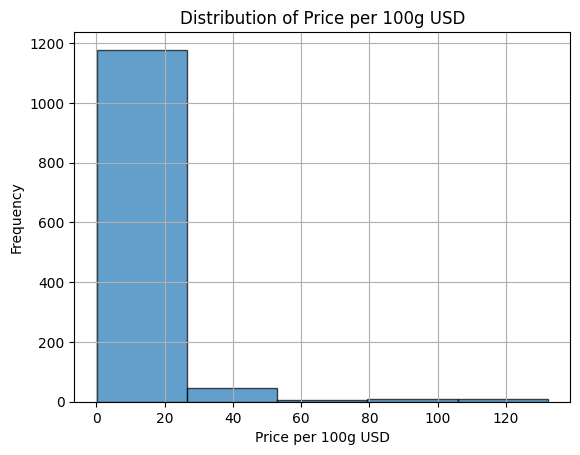

Mean of Price per 100g USD: 10.479125200642054
Variance of Price per 100g USD: 181.8903819650351


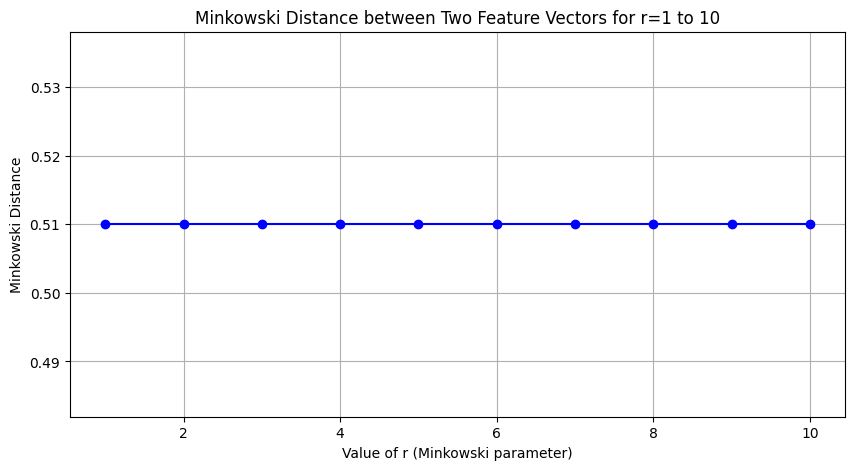

Accuracy of k-NN Classifier (k=3): 0.6818181818181818
Confusion Matrix: [[222  58]
 [ 61  33]]
Precision: 0.6784346395653816, Recall: 0.6818181818181818, F1-Score: 0.6800860605478722


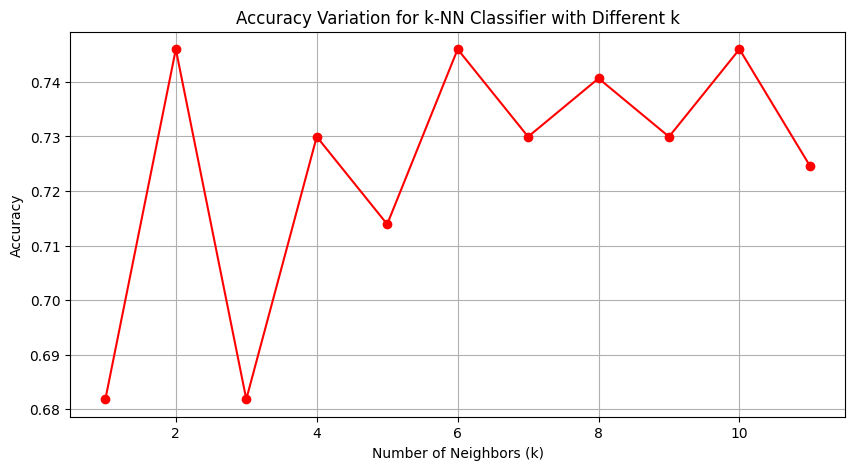

In [4]:
# A4 158_V1 CODE.
import pandas as pd
import numpy as np
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

file_path ='/Users/krishnavarma/Developer/UG AI MATERIAL /4th SEM COURSE/ML/ML CLG PR.CODES!/A4 ML/simplified_coffee.xlsx'
df = pd.read_excel(file_path)
df['Quality'] = ['High' if x >= 93 else 'Low' for x in df['rating']]

feature_value1, feature_value2 = df['100g_USD'].iloc[0], df['100g_USD'].iloc[1]

def compute_category_centroids(grouped_data):
    category_centroids = {}
    for category_label, group_data in grouped_data:
        category_mean = group_data['100g_USD'].mean()
        category_centroids[category_label] = category_mean
    return category_centroids

def calculate_category_std_devs(grouped_data):
    category_std_devs = {}
    for category_label, group_data in grouped_data:
        category_std = group_data['100g_USD'].std()
        category_std_devs[category_label] = category_std
    return category_std_devs

grouped_data = df.groupby('Quality')

category_centroids = compute_category_centroids(grouped_data)
category_std_devs = calculate_category_std_devs(grouped_data)

plt.hist(df['100g_USD'], bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('Price per 100g USD')
plt.ylabel('Frequency')
plt.title('Distribution of Price per 100g USD')
plt.grid(True)
plt.show()

mean_price = np.mean(df['100g_USD'])
variance_price = np.var(df['100g_USD'], ddof=1)

print(f"Mean of Price per 100g USD: {mean_price}")
print(f"Variance of Price per 100g USD: {variance_price}")

rs = range(1, 11)
distances = [minkowski([feature_value1], [feature_value2], r) for r in rs]
plt.figure(figsize=(10, 5))
plt.plot(rs, distances, marker='o', linestyle='-', color='blue')
plt.xlabel('Value of r (Minkowski parameter)')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors for r=1 to 10')
plt.grid(True)
plt.show()

X = df[['100g_USD']]  
y = df['Quality']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_accuracy = knn_classifier.score(X_test, y_test)
y_pred = knn_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy of k-NN Classifier (k=3): {knn_accuracy}')
print('Confusion Matrix:', confusion_mat)
print(f'Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

ks = range(1, 12)
accuracies = []
for k in ks:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(ks, accuracies, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Variation for k-NN Classifier with Different k')
plt.grid(True)
plt.show()
